<a href="https://colab.research.google.com/github/michaeliuedu/pagerank_hits/blob/main/PAGERANK_HITS_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### PageRank Implementation


In [35]:
#import numpy for vector and matrix arithmetic and matplotlib for plotting
import numpy as np
import matplotlib.pyplot as plt

In [36]:
#intialize an list of lists where list at entry i represents the outlinks for such page

links = [
    [1, 2, 3, 4], #p0 -> p1, p2, p3, p4
    [2, 4],       #p1 -> p2, p4
    [3],          #p2 -> p3
    [],           #p3 -> none (dangling)
    [2, 0, 1],    #p4 -> p2, p0, p1
]

#size of network, number of links
n = len(links)

In [37]:
#return a uniform probablity vector where each pagerank for page i is set to 1/n
def initial_pagerank(links):
  entry = 1/n
  R = np.full(n, entry, dtype = float)
  return R

In [38]:
#by the iterative equation, returns the pagerank vector Ri = f + dLR
def iterate_pagerank(R, L, d):
  f = np.full(n, (1-d)/n, dtype = float)
  Ri = f + d * np.dot(L, R)
  return Ri

In [39]:
#creates an n by n linking matrix where the Li,j entry is 1/o if
#page pj links to pi and 0 otherwise. note that o is the number of
#outbound links from pj. we implement the dangling node fix by
#replacing zero columns with a uniformly distributed column of entries
#1/n
def compute_link_mat(links):
  L = np.zeros((n, n), dtype = float)
  for i in range(n):
    for j in range(n):
      if len(links[j]) == 0:
        L[i][j] = 1/n
      elif i in links[j]:
        o = len(links[j])
        L[i][j] = 1/o
  return L

In [40]:
#iteratively determine pagerank until the difference is negligible.
#included code for plotting and tracing for comparisons
def pagerank(links, d = 0.85, epsilon = 0.0001, trace = True, plot_diff = True):
  R0 = initial_pagerank(links)
  L = compute_link_mat(links)
  R1 = iterate_pagerank(R0, L, d)

  diff = np.sum(abs(R1 - R0))
  differences = [diff]

  if trace:
    print("initial pagerank: " + str(R0))
    print("iteration 1: " + str(R1)  + " diff = " + str(round(diff, 5)))

  itr = 1
  while(diff > epsilon):
    itr = itr + 1
    R0 = R1
    R1 = iterate_pagerank(R0, L, d)

    diff = np.sum(abs(R1 - R0))
    differences.append(diff)

    if trace:
      print("iteration " + str(itr) + ": " + str(R1) + " diff = " + str(round(diff, 5)))

  if trace:
    print("total iterations: " + str(itr))

  if plot_diff:
    plt.figure(figsize=(5, 5))
    plt.title("difference between iterations")
    plt.plot(differences, "-o")
    plt.xlabel("iteration")
    plt.ylabel("difference")

    plt.grid(True)
    plt.show()

    plt.figure(figsize=(5, 5))
    plt.title("difference between iterations (y scale log)")
    plt.plot(differences, "-o")
    plt.xlabel("iteration")
    plt.ylabel("difference")
    plt.yscale("log")

    plt.grid(True)
    plt.show()
  return R1

initial pagerank: [0.2 0.2 0.2 0.2 0.2]
iteration 1: [0.12066667 0.16316667 0.24816667 0.2765     0.1915    ] diff = 0.24933
iteration 2: [0.13126333 0.156905   0.22625083 0.31358833 0.1719925 ] diff = 0.09537
iteration 3: [0.13204123 0.15993468 0.22661931 0.30351668 0.1778881 ] diff = 0.02014
iteration 4: [0.13199946 0.16005822 0.22803047 0.30228301 0.17762884] diff = 0.00307
iteration 5: [0.13171628 0.15976617 0.22779091 0.30326389 0.17746274] diff = 0.00196
iteration 6: [0.13183597 0.15982568 0.2277263  0.30316685 0.17744519] diff = 0.00036
iteration 7: [0.1318145  0.15982965 0.22775556 0.30312087 0.17747942] diff = 0.00013
iteration 8: [0.13181638 0.15982697 0.22775457 0.30313336 0.17746873] diff = 3e-05
total iterations: 8


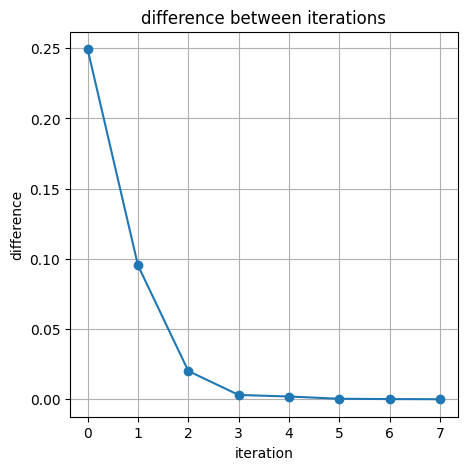

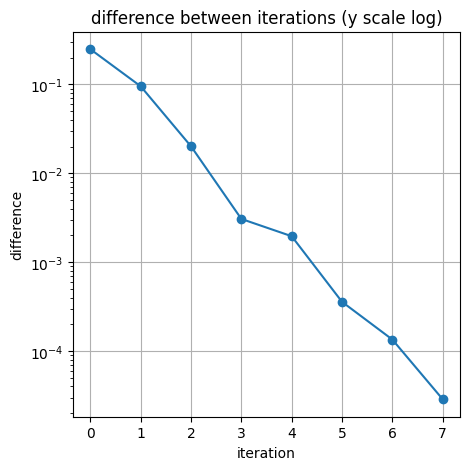

final pagerank: (array([0.13181638, 0.15982697, 0.22775457, 0.30313336, 0.17746873]), 5)


In [41]:
pr = pagerank(links)
print("final pagerank: " + str((pr, 5)))

### HITS Implementation


In [42]:
#compute the linking matrix L for HITS whre ethe Li,j entry is 1 if
#page i has an outgoing link to page j and 0 otherwise
def compute_link_mat_hits(links):
  L = np.zeros((n, n), dtype = float)
  for i in range(n):
    for j in range(n):
      if j in links[i]:
        L[i][j] = 1
  return L

In [43]:
#set the inital hits and authority vectors to all 1 as required
def initial_hits(links):
  auth = np.full(n, 1, dtype = float)
  hub = np.full(n, 1, dtype = float)
  return auth, hub

In [44]:
#compute a = L^Th and h = La on each iteration
def iterate_hits(auth, hub, L):
  auth = np.dot(L.T, hub)
  auth = auth / np.linalg.norm(auth)
  hub = np.dot(L, auth)
  hub = hub / np.linalg.norm(hub)
  return auth, hub

In [45]:
#iteratively determine the authority and hub score until the differences
#are negligible. included tracing code.
def hits(links, epsilon=1e-6, trace=True):
    L = compute_link_mat_hits(links)

    A0, H0 = initial_hits(links)
    A1, H1 = iterate_hits(A0, H0, L)

    authority_diff = np.linalg.norm(A1 - A0)
    hubs_diff = np.linalg.norm(H1 - H0)

    if trace:
        print("iteration 1: \n   auth =" + str(A1) + "diff auth =" + str(round(authority_diff, 8)) +
              "\n   hub =" + str(H1) + "diff hub =" + str(round(hubs_diff, 8)))

    itr = 1
    while authority_diff > epsilon or hubs_diff > epsilon:
        itr += 1

        A0, H0 = A1, H1
        A1, H1 = iterate_hits(A0, H0, L)

        authority_diff = np.linalg.norm(A1 - A0)
        hubs_diff = np.linalg.norm(H1 - H0)

        if trace:
              print("iteration " + str(itr) + ": \n   auth =" + str(A1) + "diff auth =" + str(round(authority_diff, 8)) +
              "\n   hub =" + str(H1) + "diff hub =" + str(round(hubs_diff, 8)))

    return A1, H1


In [46]:
auth, hub = hits(links)

iteration 1: 
   auth =[0.21320072 0.42640143 0.63960215 0.42640143 0.42640143]diff auth =1.31756809
   hub =[0.7448453  0.41380294 0.16552118 0.         0.49656353]diff hub =1.53575196
iteration 2: 
   auth =[0.19185884 0.47964711 0.63952948 0.35174121 0.44767064]diff auth =0.09652518
   hub =[0.74091015 0.41984908 0.13583353 0.         0.5062886 ]diff hub =0.03206205
iteration 3: 
   auth =[0.19549538 0.48158618 0.6437043  0.33854078 0.44820892]diff auth =0.01445527
   hub =[0.73828583 0.4216146  0.13071894 0.         0.50998797]diff hub =0.00706034
iteration 4: 
   auth =[0.1969177  0.48198627 0.64478105 0.33554207 0.44786335]diff auth =0.00352904
   hub =[0.737559   0.42189363 0.12956005 0.         0.5111034 ]diff hub =0.001787
iteration 5: 
   auth =[0.19734799 0.48213535 0.64503753 0.33481327 0.44768954]diff auth =0.00091352
   hub =[0.73736669 0.42192533 0.12927858 0.         0.51142588]diff hub =0.00047032
iteration 6: 
   auth =[0.19747248 0.48218554 0.64509995 0.33463029 0.44

In [47]:
#determine the indicicies of the auth and hub verticies based
#increasing order of their entries
def determine_hits_order(auth, hub):
  auth_order = np.argsort(-auth)
  hub_order = np.argsort(-hub)
  for i in range(n):
    print("rank " + str(i + 1) + ": page " + str(auth_order[i]))
  return auth_order, hub_order

In [48]:
auth_order, hub_order = determine_hits_order(auth, hub)
print("auth order: " + str(auth_order))
print("hub order: " + str(hub_order))

rank 1: page 2
rank 2: page 1
rank 3: page 4
rank 4: page 3
rank 5: page 0
auth order: [2 1 4 3 0]
hub order: [0 4 1 2 3]


### Extension: Personalized PageRank


In [49]:
#returns a vector for the personalization vector by dividing 1 - d by
#the number of seed pages as required.
def personalization_vector(seeds, d):
    v = np.zeros(n, dtype=float)
    for page in seeds:
        v[page] = (1 - d) / len(seeds)
    return v

In [50]:
#modifies the pagerank code above by computing Ri = v + dLR instead of
#Ri = f + dLR where v is now a biased vector which prioritizes pages
#that are considered seeds instead of being distributed uniformally.
def personalized_pagerank(links, seed_pages, d = 0.85, epsilon = 0.0001, trace = True, plot_diff = True):
  R0 = initial_pagerank(links)
  L = compute_link_mat(links)
  v = personalization_vector(seed_pages, d)
  R1 = v + d * np.dot(L, R0)

  diff = np.sum(abs(R1 - R0))
  differences = [diff]

  if trace:
    print("personalization vector: " + str(v) + " \n")

    print("initial pagerank: " + str(R0))
    print("iteration 1: " + str(R1)  + " diff = " + str(round(diff, 5)))

  itr = 1
  while(diff > epsilon):
    itr = itr + 1
    R0 = R1
    R1 = v + d * np.dot(L, R0)

    diff = np.sum(abs(R1 - R0))
    differences.append(diff)

    if trace:
      print("iteration " + str(itr) + ": " + str(R1) + " diff = " + str(round(diff, 5)))

  if trace:
    print("total iterations: " + str(itr))

  if plot_diff:
    plt.figure(figsize=(5, 5))
    plt.title("difference between iterations")
    plt.plot(differences, "-o")
    plt.xlabel("iteration")
    plt.ylabel("difference")

    plt.grid(True)
    plt.show()

    plt.figure(figsize=(5, 5))
    plt.title("difference between iterations (y scale log)")
    plt.plot(differences, "-o")
    plt.xlabel("iteration")
    plt.ylabel("difference")
    plt.yscale("log")

    plt.grid(True)
    plt.show()
  return R1

In [51]:
#example with one seed page, p2
seed_pages_1 = [2]
R1 = personalized_pagerank(links, seed_pages_1, trace = True, plot_diff = False)

personalization vector: [0.   0.   0.15 0.   0.  ] 

initial pagerank: [0.2 0.2 0.2 0.2 0.2]
iteration 1: [0.09066667 0.13316667 0.36816667 0.2465     0.1615    ] diff = 0.42933
iteration 2: [0.08766333 0.10693    0.31352583 0.37411333 0.1177675 ] diff = 0.25523
iteration 3: [0.09696673 0.11559518 0.31104043 0.34872468 0.12767297] diff = 0.05575
iteration 4: [0.09545721 0.11606263 0.31519059 0.34427299 0.12901658] diff = 0.01192
iteration 5: [0.09508111 0.11536576 0.31469238 0.34672306 0.12813768] diff = 0.0049
iteration 6: [0.0952486  0.11545333 0.31448378 0.34663618 0.1281781 ] diff = 0.00059
iteration 7: [0.09524528 0.11548561 0.31455327 0.34647969 0.12823614] diff = 0.00032
iteration 8: [0.09523512 0.11547474 0.31455613 0.34651145 0.12822255] diff = 7e-05
total iterations: 8


In [52]:
#example with two seed pages, p0 and p4
seed_pages_2 = [0, 4]
R2 = personalized_pagerank(links, seed_pages_2, trace = True, plot_diff = False)

personalization vector: [0.075 0.    0.    0.    0.075] 

initial pagerank: [0.2 0.2 0.2 0.2 0.2]
iteration 1: [0.16566667 0.13316667 0.21816667 0.2465     0.2365    ] diff = 0.20233
iteration 2: [0.18391333 0.1441175  0.20071333 0.26255083 0.208705  ] diff = 0.0905
iteration 3: [0.17876673 0.14284831 0.20409825 0.25432156 0.21996516] diff = 0.02929
iteration 4: [0.18055813 0.14354606 0.20425659 0.2547061  0.21693313] diff = 0.00606
iteration 5: [0.17976442 0.14313303 0.2041401  0.25528674 0.21767571] diff = 0.00265
iteration 6: [0.18007353 0.14327347 0.20410501 0.25511777 0.21743022] diff = 0.0009
iteration 7: [0.17997525 0.14324088 0.2041321  0.2551249  0.21752687] diff = 0.00026
iteration 8: [0.18000385 0.14324859 0.20412596 0.25512826 0.21749335] diff = 8e-05
total iterations: 8


In [53]:
#function to print the difference between pagerank scores in a
#visually understandable manner
def compare_personalized_pagerank(PR, PPR, seed_pages):
  print("Page        PageRank      Personalized PR    Difference")
  for i in range(n):
    seed_inf = ""
    if(i in seed_pages):
      seed_inf = " (seed)"
    print("Page " + str(i) + ":     " + str(round(PR[i], 8)) + "    " + str(round(PPR[i], 8)) + "         " + str(round((PPR[i] - PR[i]), 8)) + "  " + seed_inf)

In [54]:
#compare original pagerank and personalized pagerank with single seed [2]
compare_personalized_pagerank(pr, R1, seed_pages_1)

Page        PageRank      Personalized PR    Difference
Page 0:     0.13181638    0.09523512         -0.03658126  
Page 1:     0.15982697    0.11547474         -0.04435222  
Page 2:     0.22775457    0.31455613         0.08680156   (seed)
Page 3:     0.30313336    0.34651145         0.0433781  
Page 4:     0.17746873    0.12822255         -0.04924618  


In [55]:
#compare original pagerank and personalized pagerank with two seeds [0, 4]
compare_personalized_pagerank(pr, R2, seed_pages_2)

Page        PageRank      Personalized PR    Difference
Page 0:     0.13181638    0.18000385         0.04818746   (seed)
Page 1:     0.15982697    0.14324859         -0.01657838  
Page 2:     0.22775457    0.20412596         -0.02362861  
Page 3:     0.30313336    0.25512826         -0.0480051  
Page 4:     0.17746873    0.21749335         0.04002462   (seed)
